# 単一始点最短経路問題
- Bellman-Ford
- Dijkstra
で最短経路問題を解く.

問題は隣接リストで与えられるものとする.

In [1]:
import math
import heapq
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 隣接リスト
L = [
    {1:2, 2:5},
    {0:2, 2:4, 3:6, 4:10},
    {0:5, 1:4, 3:2},
    {1:6, 2:2, 5:1},
    {1:10, 5:3, 6:5},
    {3:1, 4:3, 6:9},
    {4:5, 5:9}
]

for v, l in enumerate(L):
    print(f'{v}:', l)

# ノード数
num_v = len(L)
print(num_v)

0: {1: 2, 2: 5}
1: {0: 2, 2: 4, 3: 6, 4: 10}
2: {0: 5, 1: 4, 3: 2}
3: {1: 6, 2: 2, 5: 1}
4: {1: 10, 5: 3, 6: 5}
5: {3: 1, 4: 3, 6: 9}
6: {4: 5, 5: 9}
7


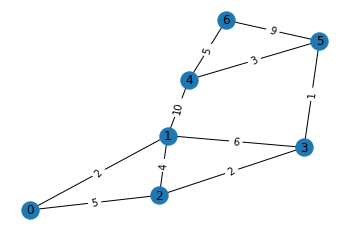

In [3]:
# グラフ可視化
G = nx.Graph()
G.add_nodes_from(list(range(num_v)))

# u -w-> v
for u, li in enumerate(L):
    for v, w in li.items():
        G.add_weighted_edges_from([(u, v, w)])

edge_labels=dict([((u,v,),d['weight'])
                 for u,v,d in G.edges(data=True)])

pos = nx.spring_layout(G)
nx.draw_networkx_edge_labels(G, pos,edge_labels=edge_labels)
nx.draw_networkx(G, pos)
plt.axis("off")
plt.show()

## Bellman–Ford Algorithm

始点sからノードiへの最短距離をd[i]とすると,
$$d[i] = min\{d[j] + (jからiへのコスト) | e=(j, i) \in E\}$$
となる.

- グラフがDAGであれば, 漸化式を用いて計算することが可能
- DAGでなくても, $d[i]$の初期値をinfにすることで計算可能
- 負の閉路がなければ, 各ノードは最大でも1回しか通らないので, 計算量は$\mathcal{O}(|V|\times|E|)$程度
- 負の閉路がある場合, 負の閉路を無限に周回することでコストが無限に減少していくので,ループ回数が$|V|-1$を超えるので, 判別可能

In [4]:
# スタートノードからの最短距離初期化
dist = [math.inf] * num_v
dist[0] = 0

for _ in range(num_v-1):
    for u, li in enumerate(L):
        for v, w in li.items():
            dist[v] = min(dist[v], dist[u] + w)
print(dist)

[0, 2, 5, 7, 11, 8, 16]


## Dijkstra's Algorithm
- ベルマンフォード法では
    - d[j]が最短距離でなければ, 更新が無駄になってしまう
    - d[j]の値が変化しなくても, 毎回ループで確認しているので無駄
- dijkstra法では
    - 最短距離が確定したノードと隣接したノードのみ更新
    - 最短距離が確定したノードは使用しない

dijkstraは
1. 距離が最小のノードの値を確定する.
2. 確定したノードと隣接するノードの値を更新する.
3. 未確定のノードが無くなるまで以上を続ける.

未確定ノードの集合をpriority-queueで実装することで計算量が$\mathcal{O}(|E|\log{|V|})$程度に

In [5]:
# スタートノードからの最短距離初期化
dist = [math.inf] * num_v
dist[0] = 0
# 未確定のノードのheapq(priority-queue), (weight, node)の順でデータが入ってる
q = []
heapq.heappush(q, (0, 0))

while q:
    # u:確定するノード
    _, u = heapq.heappop(q)
    # uの隣接するノードの距離を更新
    for v, w in L[u].items():
        if dist[v] > dist[u] + w:
            dist[v] = dist[u] + w
            heapq.heappush(q, (dist[v], v))
print(dist)

[0, 2, 5, 7, 11, 8, 16]
